In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # for tree.plot_tree()
from sklearn.tree import export_text # for export_text()
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV

In [2]:
heart = pd.read_csv("heart.csv")
heart.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [3]:
heart.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

In [5]:
heart.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,...,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000
mean,0.094173,0.428990,0.424113,0.962667,28.382475,0.443186,0.040570,0.296904,0.756577,0.634264,...,0.951049,0.084164,2.511379,3.184778,4.242028,0.168221,0.440348,8.032197,5.050461,6.054052
std,0.292070,0.494933,0.494209,0.189578,6.608638,0.496763,0.197292,0.698147,0.429149,0.481637,...,0.215766,0.277633,1.068472,7.412822,8.717905,0.374063,0.496430,3.054203,0.985718,2.071036
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
heart.HeartDiseaseorAttack.value_counts()

HeartDiseaseorAttack
0    229773
1     23888
Name: count, dtype: int64

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


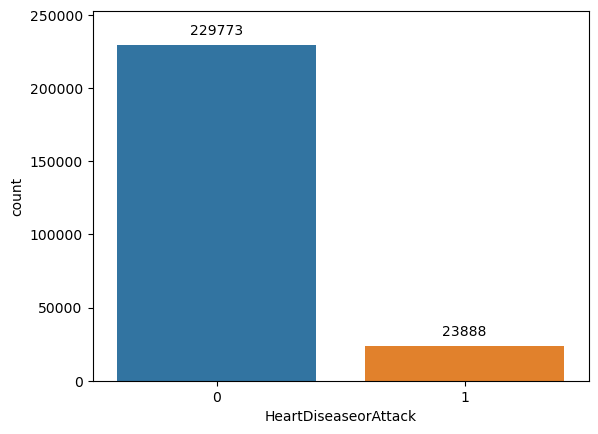

In [7]:
ax = sns.countplot(data=heart, x="HeartDiseaseorAttack")
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

In [8]:
no_HeartDiseaseorAttack = len(heart[heart.HeartDiseaseorAttack == 0])
HeartDiseaseorAttack = len(heart[heart.HeartDiseaseorAttack == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((no_HeartDiseaseorAttack / (len(heart.HeartDiseaseorAttack))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((HeartDiseaseorAttack / (len(heart.HeartDiseaseorAttack))*100)))

Percentage of Patients Haven't Heart Disease: 90.58%
Percentage of Patients Have Heart Disease: 9.42%


In [9]:
heart.Sex.value_counts()

Sex
0    141962
1    111699
Name: count, dtype: int64

In [10]:
heart.Age.value_counts()

Age
9     33243
10    32193
8     30831
7     26313
11    23531
6     19815
13    17362
5     16153
12    15979
4     13823
3     11121
2      7597
1      5700
Name: count, dtype: int64

In [11]:
heart.Income.value_counts()

Income
8    90384
7    43217
6    36468
5    25882
4    20131
3    15994
2    11777
1     9808
Name: count, dtype: int64

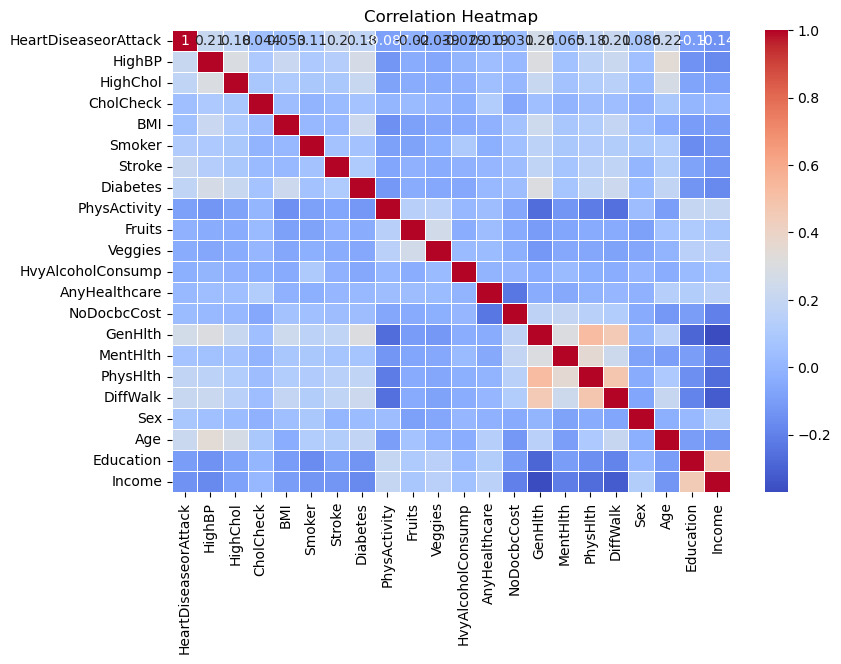

In [14]:
plt.figure(figsize=(9,6))
sns.heatmap(heart.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Train Test Data Prepare

In [33]:
X = heart.drop('HeartDiseaseorAttack', axis=1)
y = heart['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=451)

In [34]:
rs = RandomOverSampler()
X_train_resampled, y_train_resampled = rs.fit_resample(X_train, y_train)

# Decision Tree

In [35]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=451)
decision_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=451)

In [36]:
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

print(f"Classification Report:\n{report}\n")

Accuracy: 0.8531922023140757

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     45934
           1       0.25      0.27      0.26      4799

    accuracy                           0.85     50733
   macro avg       0.59      0.59      0.59     50733
weighted avg       0.86      0.85      0.86     50733




In [ ]:
param_grid = {'max_depth': range(70, 150)}

scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring=scorer, cv=5)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", test_accuracy)

# Best parameters found:  {'max_depth': 43}
# Best CV score:  0.9499181366480725
# Test set accuracy:  0.8534287347485857

In [38]:
importances = decision_tree.feature_importances_
feature_names = X.columns
feature_importance_dict = {name: importance for name, importance in zip(feature_names, importances)}

print("Feature importances:")
for name, importance in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True):
    print(f"{name}: {importance}")

Feature importances:
BMI: 0.17766110009686778
Age: 0.12086688225336602
HighBP: 0.09575487579929222
Income: 0.09045608099692014
GenHlth: 0.0846252107584416
PhysHlth: 0.07023385702989772
Education: 0.061499175399339176
MentHlth: 0.056373451762941666
Fruits: 0.029337588110022062
PhysActivity: 0.025419324482143308
Smoker: 0.02499837623230624
Diabetes: 0.024035077410314395
DiffWalk: 0.023403741448590903
Sex: 0.02281729799535243
Veggies: 0.022669563004356123
HighChol: 0.02067847370363861
Stroke: 0.016356927868174827
NoDocbcCost: 0.012303470918511313
HvyAlcoholConsump: 0.009671501330084912
AnyHealthcare: 0.00639174647373322
CholCheck: 0.004446276925705312


In [39]:
feature_importance_list = list(feature_importance_dict.keys())

In [40]:
#tree.plot_tree(decision_tree, feature_names=feature_importance_list, filled=True)

In [41]:
# print(export_text(decision_tree, feature_names=feature_importance_list))

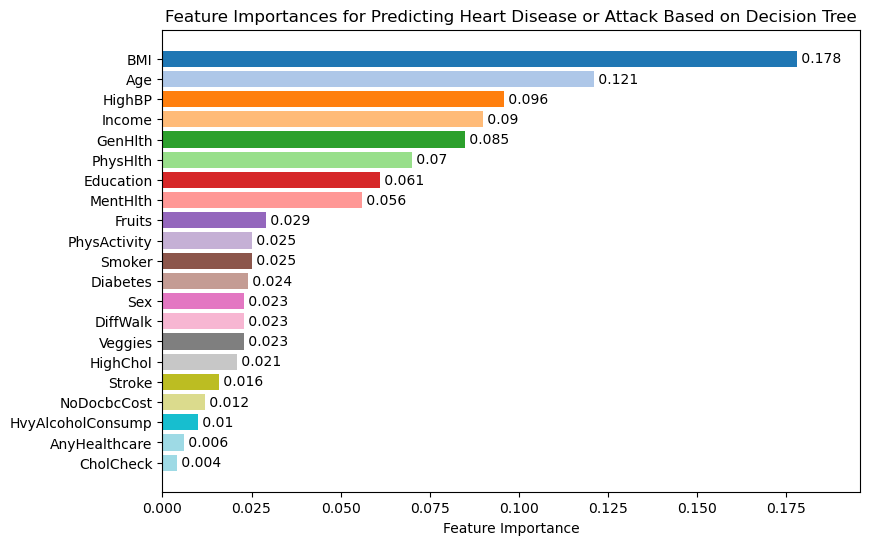

In [42]:
feature_names = list(feature_importance_dict.keys())
importances = list(feature_importance_dict.values())

rounded_importances = np.round(importances, 3)

sorted_indices = np.argsort(rounded_importances)[::-1]
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_rounded_importances = rounded_importances[sorted_indices]

colors = plt.cm.tab20(np.linspace(0, 1, len(sorted_rounded_importances)))

plt.figure(figsize=(9, 6))
bars = plt.barh(range(len(sorted_rounded_importances)), sorted_rounded_importances, color=colors)

for bar, importance in zip(bars, sorted_rounded_importances):
    plt.text(importance, bar.get_y() + bar.get_height()/2, f' {importance}', va='center')

plt.yticks(range(len(sorted_rounded_importances)), np.array(sorted_feature_names))
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Predicting Heart Disease or Attack Based on Decision Tree')
plt.xlim(0, max(sorted_rounded_importances) * 1.1)
plt.gca().invert_yaxis()
plt.show()

# Random Forest

In [43]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, random_state=451)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', random_state=451)

In [44]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

print(f"Classification Report:\n{report}\n")

Accuracy: 0.8901898172786944

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     45934
           1       0.37      0.24      0.29      4799

    accuracy                           0.89     50733
   macro avg       0.65      0.60      0.62     50733
weighted avg       0.87      0.89      0.88     50733




In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': range(10, 40, 10),
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=451)

scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=5)

#grid_search.fit(X_train_resampled, y_train_resampled)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_cv_accuracy = grid_search.best_score_

print("Best parameters found:", best_params)
print("Best CV accuracy:", best_cv_accuracy)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy)

# For resampled data:
# Best parameters found: {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 300}
# Best CV accuracy: 0.9714233650749071
# Test set accuracy: 0.8894013758303274

# For initial data:
# Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}
# Best CV accuracy: 0.9077603830749059
# Test set accuracy: 0.907417262925512

Feature ranking:
1. Feature: BMI (Importance: 0.170041)
2. Feature: Age (Importance: 0.144543)
3. Feature: Income (Importance: 0.090602)
4. Feature: GenHlth (Importance: 0.080307)
5. Feature: PhysHlth (Importance: 0.073228)
6. Feature: Education (Importance: 0.061127)
7. Feature: MentHlth (Importance: 0.056007)
8. Feature: HighBP (Importance: 0.053142)
9. Feature: DiffWalk (Importance: 0.033017)
10. Feature: HighChol (Importance: 0.032642)
11. Feature: Diabetes (Importance: 0.028341)
12. Feature: Fruits (Importance: 0.028017)
13. Feature: Sex (Importance: 0.026508)
14. Feature: PhysActivity (Importance: 0.023377)
15. Feature: Veggies (Importance: 0.022165)
16. Feature: Smoker (Importance: 0.022080)
17. Feature: Stroke (Importance: 0.021239)
18. Feature: NoDocbcCost (Importance: 0.012388)
19. Feature: HvyAlcoholConsump (Importance: 0.009025)
20. Feature: AnyHealthcare (Importance: 0.007277)
21. Feature: CholCheck (Importance: 0.004929)


/var/folders/5p/g82q05js0bs2xkv11dw5ksy80000gn/T/ipykernel_10336/3268819759.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  unique_colors = plt.cm.get_cmap('tab20', num_features)


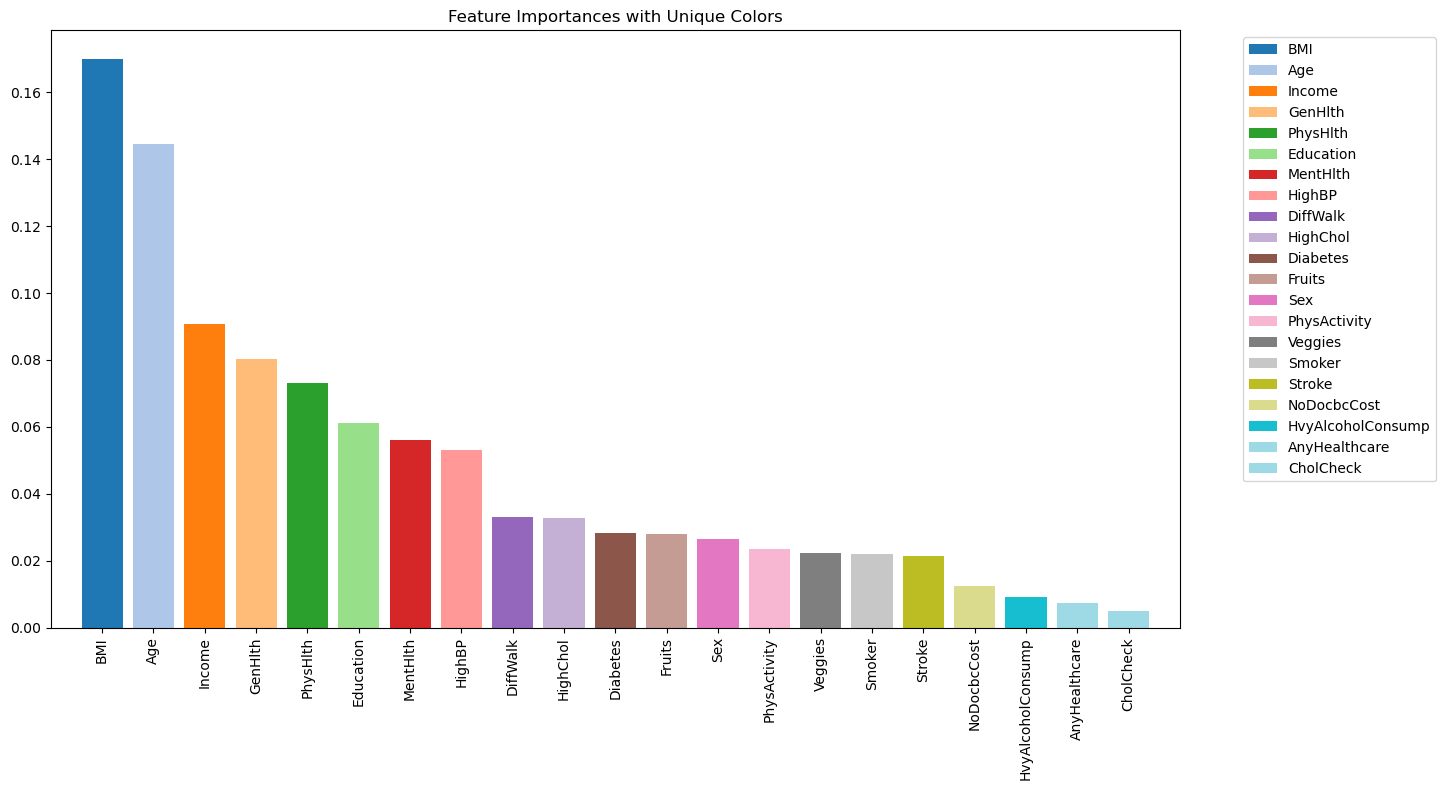

In [45]:
# feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for rank, index in enumerate(indices, start=1):
    feature_name = X.columns[index]
    importance = importances[index]
    print(f"{rank}. Feature: {feature_name} (Importance: {importance:.6f})")

num_features = len(indices)
unique_colors = plt.cm.get_cmap('tab20', num_features)

plt.figure(figsize=(12, 8))
plt.title("Feature Importances with Unique Colors")
bars = plt.bar(range(num_features), importances[indices], color=[unique_colors(i) for i in range(num_features)], align="center")

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()

plt.legend(bars, X.columns[indices], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()